<a href="https://colab.research.google.com/github/lakshmishivanik/lakshmi_google_ai_studio/blob/main/Codeexecution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!pip install -U -q 'google-genai>=1.2.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 3.0 MB/s eta 0:00:00


In [2]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_GENAI_API_KEY')

In [3]:
from google import genai

client = genai.Client(api_key=GOOGLE_API_KEY)

In [4]:
MODEL_ID = "gemini-2.0-flash" # @param ["gemini-1.5-flash-8b","gemini-1.5-flash-002","gemini-2.0-flash-lite","gemini-2.0-flash", "gemini-2.0-pro-exp-02-05"] {"allow-input":true}

In [5]:
from IPython.display import Image, Markdown, Code, HTML

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, width=800, format="png"))
    display(Markdown("---"))

In [6]:
from google.genai import types

prompt = """
    What is the sum of the first 50 prime numbers?
    Generate and run code for the calculation, and make sure you get all 50.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config = types.GenerateContentConfig(
        tools=[types.Tool(
            code_execution=types.ToolCodeExecution
            )]
        )
    )

display_code_execution_result(response)

Okay, I can calculate the sum of the first 50 prime numbers. I will generate a list of the first 50 primes and then sum them up.



---

---

primes=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
sum(primes)=5117


---

The sum of the first 50 prime numbers is 5117.


---

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Save the DataFrame to a CSV file
california_housing.frame.to_csv('houses.csv', index=False)

# Read the CSV file into a pandas DataFrame
houses_data = pd.read_csv('houses.csv', nrows=100)
houses_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# Upload diving_data.csv file using the File API
houses_file = client.files.upload(
    file='houses.csv',
    config=types.FileDict(display_name='Blocks Data')
)

print(f"Uploaded file '{houses_file.display_name}' as: {houses_file.uri}")

Uploaded file 'Blocks Data' as: https://generativelanguage.googleapis.com/v1beta/files/906szjjwwh0f


Uploaded file 'Blocks Data' as: https://generativelanguage.googleapis.com/v1beta/files/1vu4sfuwoygv


Okay, I understand the request. I need to:

1.  Load the data from the provided CSV data.
2.  Identify the top 20 most expensive blocks based on `MedHouseVal`.
3.  Create a scatterplot with `HouseAge` on the x-axis and `MedHouseVal` on the y-axis.
4.  Use a different color for each of the top 20 blocks in the scatterplot.
5.  Include a legend to identify each block's color.
6.  Identify and highlight potential anomalies in the scatterplot.

Here's the first step, loading the data and identifying the top 20 most expensive blocks:



---

---

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0   10.1275      27.0  7.493421   1.039474       772.0  2.539474     33.55    -117.88      5.00001
1    7.0422      52.0  7.045455   1.090909       967.0  2.585561     37.57    -122.34      5.00001
18  10.1675      23.0  8.834286   1.067143      2165.0  3.092857     37.54    -122.36      5.00001
17   4.7404      43.0  5.855140   1.009346       967.0  2.259346     37.58    -122.37      5.00001
16  14.4219      52.0  8.253731   0.950249       519.0  2.582090     37.56    -122.35      5.00001
15   8.2598      52.0  7.094708   1.038997       876.0  2.440111     37.57    -122.34      5.00001
14  10.4286      52.0  7.919708   0.981752       784.0  2.861314     37.57    -122.35      5.00001
13  11.7045      40.0  7.764045   0.938202       483.0  2.713483     34.04    -118.51      5.00001
12   3.4902      34.0  4.274064   1.082219      2400.0  1.604278     37.56    -122.33      5.00001
11   5.5490      49.0  7.000000   1.038194       691.0  2.399306     37.56    -122.32      5.00001
10   4.8125      31.0  4.684332   1.095622      1532.0  1.764977     34.04    -118.49      5.00001
9   10.0743      50.0  7.868526   0.976096       644.0  2.565737     37.56    -122.33      5.00001
8    4.6406      50.0  6.100000   1.056098      1050.0  2.560976     37.55    -122.32      5.00001
7    9.3694      51.0  8.300971   1.074434       870.0  2.815534     37.55    -122.33      5.00001
6    6.9533      44.0  7.608025   1.012346       843.0  2.601852     37.55    -122.34      5.00001
5    8.3839      52.0  8.061372   1.144404       769.0  2.776173     34.04    -118.50      5.00001
4   15.0001      52.0  8.000000   0.997333      1143.0  3.048000     34.04    -118.50      5.00001
3    8.0257      48.0  7.781046   1.127451       859.0  2.807190     34.04    -118.49      5.00001
2    6.1349      33.0  6.893417   0.978056       827.0  2.592476     37.55    -122.33      5.00001
19  13.3913      25.0  8.869048   1.027778      1507.0  2.990079     37.55    -122.34      5.00001


---

Now that I have the top 20 most expensive blocks, I can create the scatterplot. I'll use a different color for each block and include a legend. I'll also look for potential anomalies, which might be points that are far away from the general trend or have unusual combinations of house age and median house value.



---

---

<string>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


---

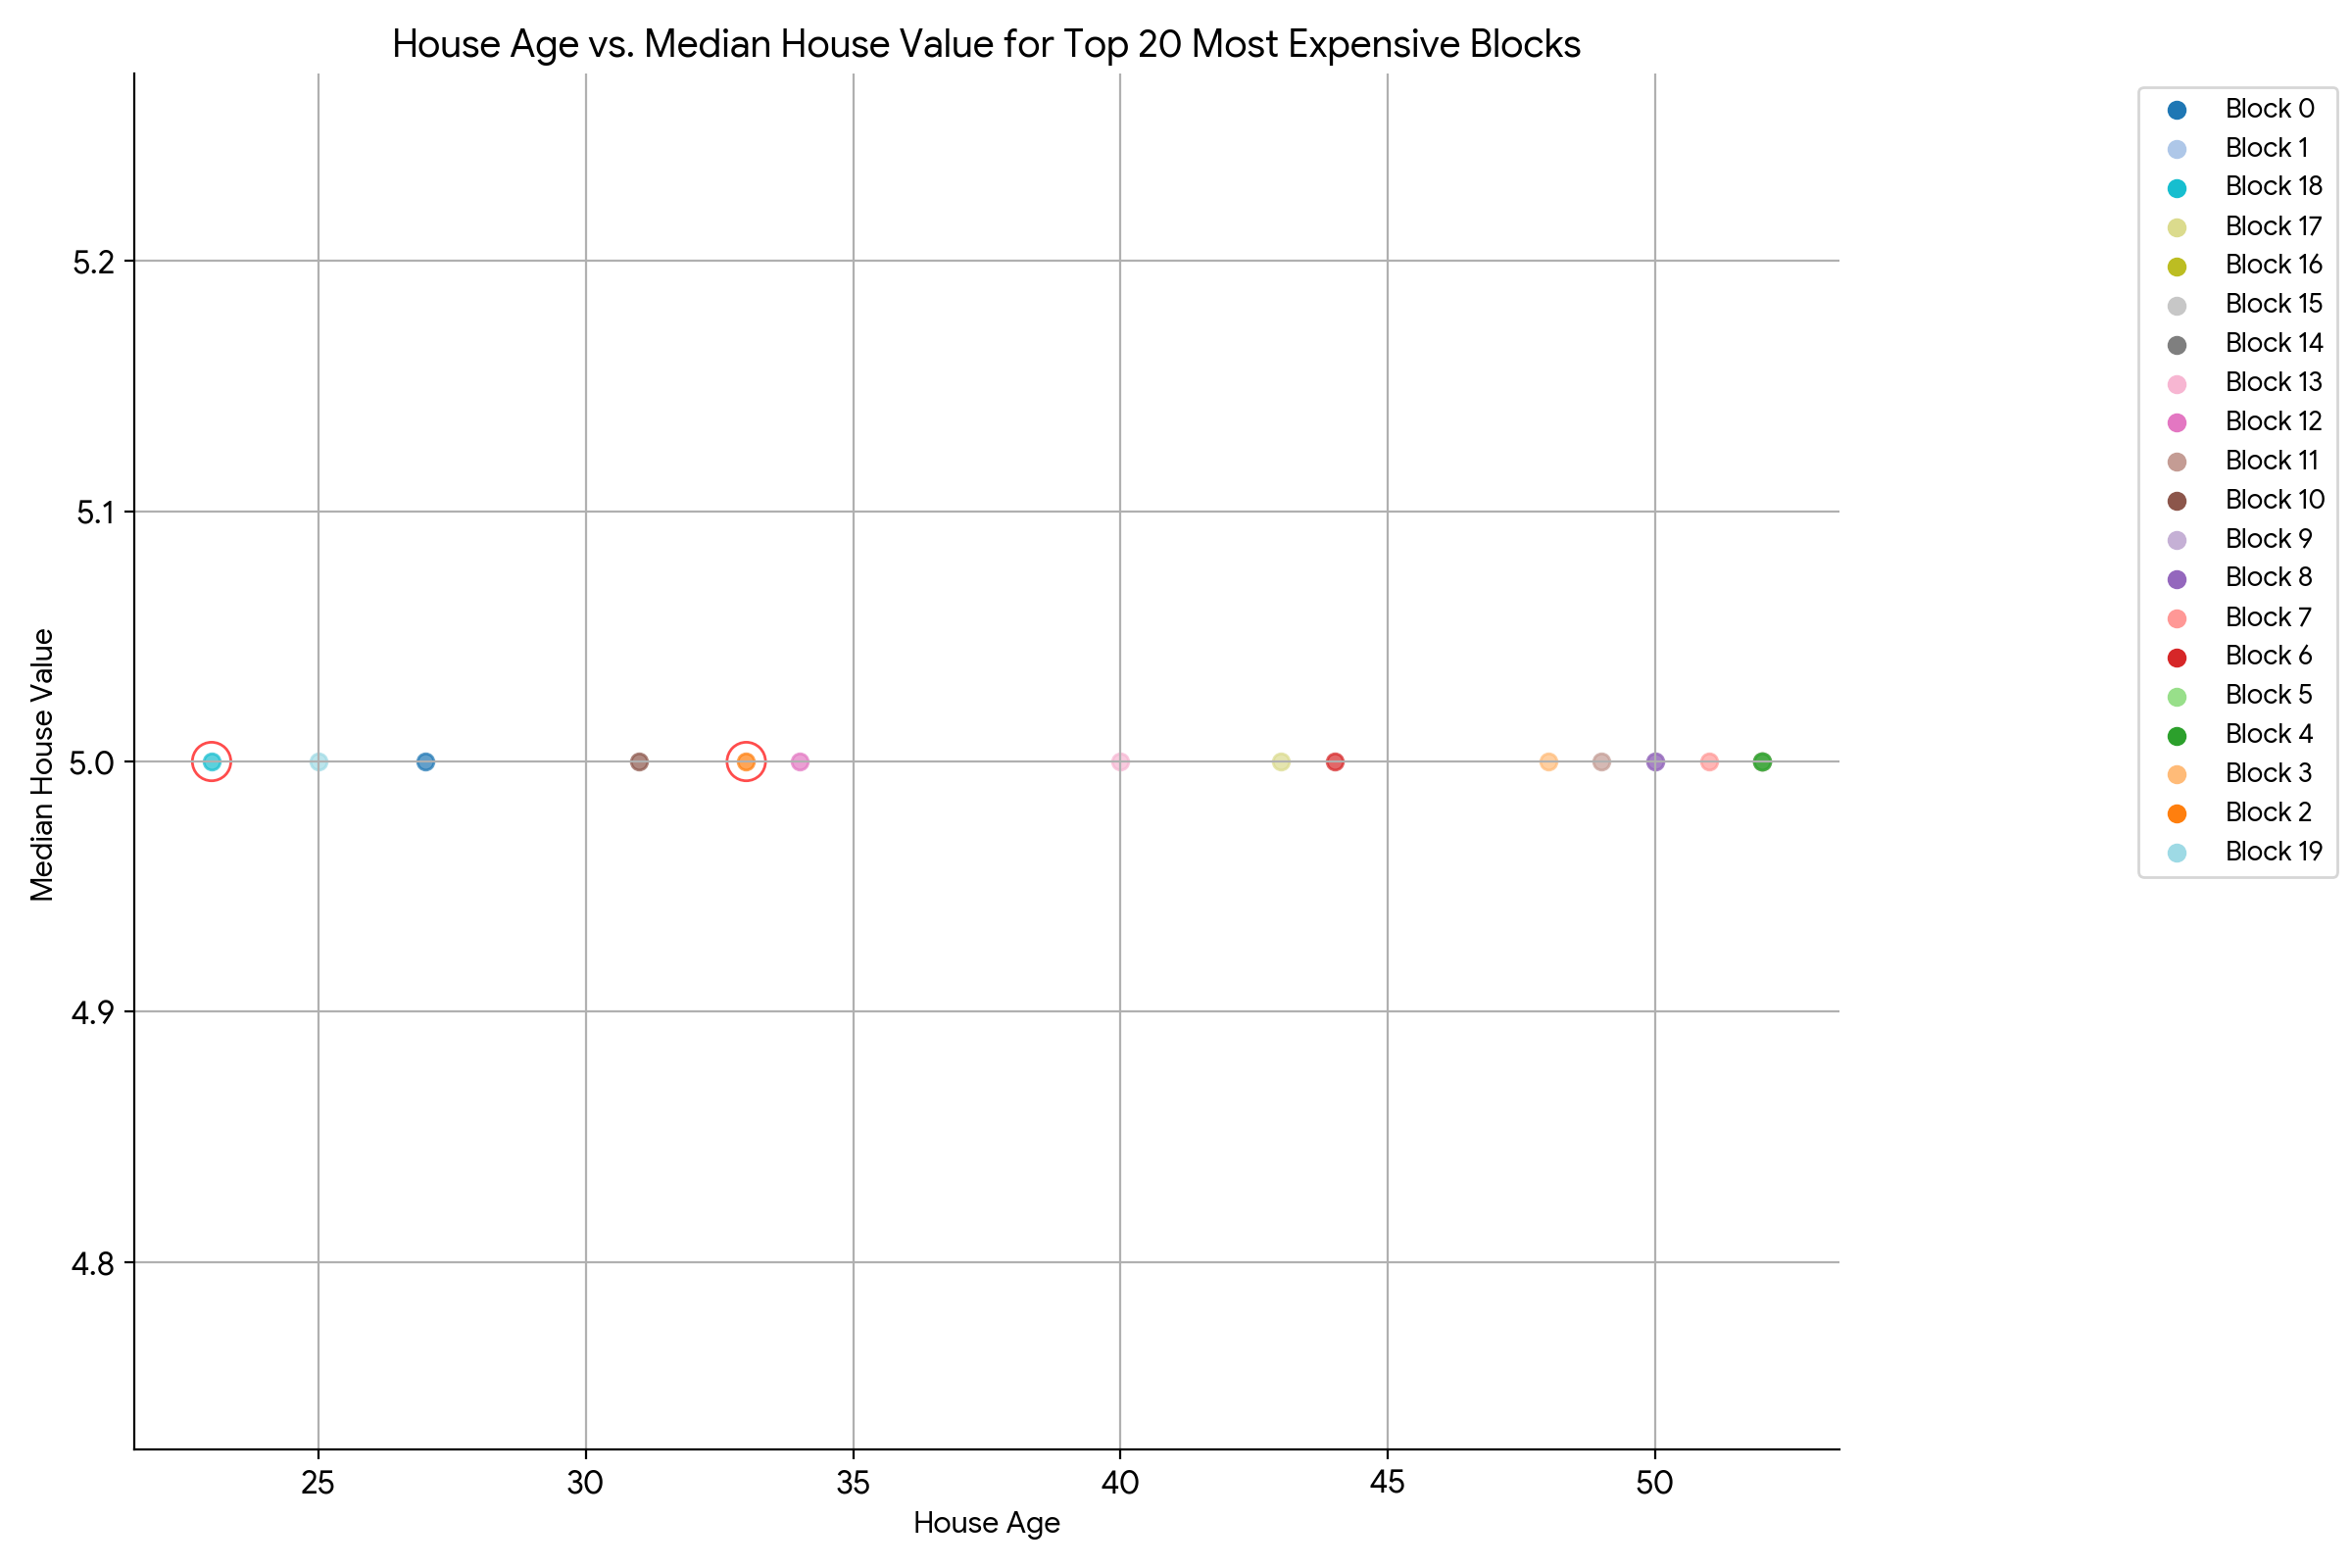

---

The scatterplot is generated successfully. We can see that all the top 20 most expensive blocks have `MedHouseVal` of 5.00001, which is likely the capped value. The plot shows the `HouseAge` distribution for these blocks.

The points circled in red (Blocks 18 and 2) were identified as potential anomalies because they have relatively lower house ages compared to other blocks with the same (maximum) median house value. This might indicate that these are newer blocks that have reached the maximum house value faster than older blocks. They could be areas that have seen rapid development and price appreciation.


---

In [14]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Save a smaller subset of the DataFrame to a CSV file
# Using only the top 20 most expensive blocks as requested in the prompt
top_20_expensive = california_housing.frame.sort_values('MedHouseVal', ascending=False).head(20)
top_20_expensive.to_csv('houses_top20.csv', index=False)

# Upload the smaller file
houses_file = client.files.upload(
    file='houses_top20.csv', # Using the smaller file
    config=types.FileDict(display_name='Blocks Data')
)

print(f"Uploaded file '{houses_file.display_name}' as: {houses_file.uri}")

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        "This dataset provides information on various blocks in California.",
        "Generate a scatterplot comparing the houses age with the median house value for the top-20 most expensive blocks.",
        "Use a different color for each block and include a legend.", # Reworded for color distinction
        "Plot the age as the x-axis and the median house value as the y-axis.",
        "In addition, point out on the graph which points could be anomalies? Circle the anomaly in red on the graph.",
        houses_file
    ],
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

display_code_execution_result(response)

Okay, I understand the request. Here's the plan:

1.  **Load the data:** Read the provided CSV data into a pandas DataFrame.
2.  **Filter the data:** Select rows where `HouseAge` is between 15 and 25 (inclusive).
3.  **Calculate the variance:** Calculate the variance of the `MedHouseVal` for the filtered data.
4.  **Create a violin plot:** Generate a violin plot with `HouseAge` on the x-axis and `MedHouseVal` on the y-axis, using only the filtered data.

Here's the first code block to load the data and inspect it:



---

---

    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0  10.1275      27.0  7.493421   1.039474       772.0  2.539474     33.55    -117.88      5.00001
1   7.0422      52.0  7.045455   1.090909       967.0  2.585561     37.57    -122.34      5.00001
2   6.1349      33.0  6.893417   0.978056       827.0  2.592476     37.55    -122.33      5.00001
3   8.0257      48.0  7.781046   1.127451       859.0  2.807190     34.04    -118.49      5.00001
4  15.0001      52.0  8.000000   0.997333      1143.0  3.048000     34.04    -118.50      5.00001


---

Now that the data is loaded, I can proceed with filtering, calculating the variance, and plotting.



---

---

Variance of MedHouseVal for houses aged 15-25: 0.0


---

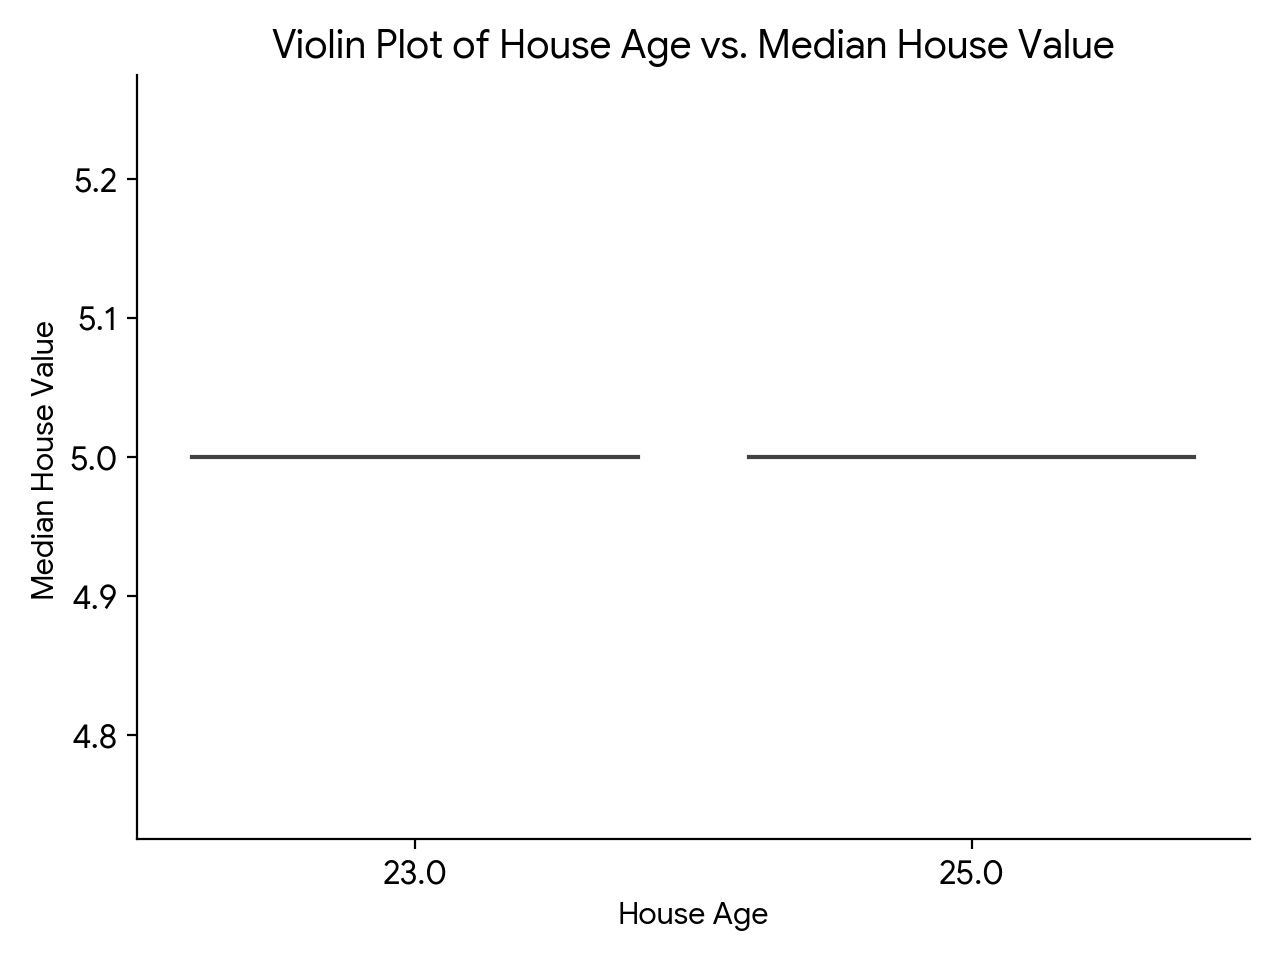

---

The variance is 0, and the violin plot shows a single line at MedHouseVal = 5. This indicates that all the houses aged between 15 and 25 have the same median house value (5.00001).


---

In [21]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        "This dataset provides information on various blocks in Californina.",
        "Calculate the variance of the house price for houses between 15 and 25 Years old",
        "Plot the variance using a violinplot",
        "I would like you to use the x-axis for the house age, and house price for the y-axis",
        houses_file
    ],
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

display_code_execution_result(response)

In [23]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate how many letter r in the word strawberry and show the code used to do it",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

In [24]:
display_code_execution_result(response)

Okay, I can calculate the number of "r"s in the word "strawberry" and show you the code I used.



---

---

3


---

There are 3 "r"s in the word "strawberry".


---

In [27]:
system_instruction="""
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        tools=[types.Tool(code_execution=types.ToolCodeExecution)],
    ),
)

In [31]:
response = chat.send_message("Run the bogo-sort algorithm with this list of numbers as input until it is sorted properly ,do as many iterations as required to completely sort it: [2,34,1,65,4]")
display_code_execution_result(response)

Okay, I will execute the bogo-sort algorithm on the list `[2, 34, 1, 65, 4]` until it is sorted. I will track the number of iterations. As bogo-sort is a randomized algorithm, the number of iterations can vary greatly.



---

---

Iteration 1: list_to_sort=[4, 34, 1, 65, 2]
Iteration 2: list_to_sort=[65, 1, 34, 2, 4]
Iteration 3: list_to_sort=[2, 1, 65, 4, 34]
Iteration 4: list_to_sort=[2, 4, 34, 1, 65]
Iteration 5: list_to_sort=[34, 65, 4, 2, 1]
Iteration 6: list_to_sort=[65, 34, 2, 1, 4]
Iteration 7: list_to_sort=[34, 4, 1, 65, 2]
Iteration 8: list_to_sort=[4, 34, 1, 2, 65]
Iteration 9: list_to_sort=[2, 65, 34, 4, 1]
Iteration 10: list_to_sort=[65, 4, 2, 34, 1]
Iteration 11: list_to_sort=[65, 4, 2, 1, 34]
Iteration 12: list_to_sort=[65, 1, 2, 4, 34]
Iteration 13: list_to_sort=[2, 34, 1, 65, 4]
Iteration 14: list_to_sort=[34, 1, 4, 65, 2]
Iteration 15: list_to_sort=[1, 2, 34, 4, 65]
Iteration 16: list_to_sort=[2, 34, 1, 65, 4]
Iteration 17: list_to_sort=[65, 1, 34, 4, 2]
Iteration 18: list_to_sort=[2, 1, 4, 34, 65]
Iteration 19: list_to_sort=[1, 2, 65, 4, 34]
Iteration 20: list_to_sort=[65, 1, 4, 34, 2]
Iteration 21: list_to_sort=[34, 2, 4, 65, 1]
Iteration 22: list_to_sort=[1, 4, 2, 34, 65]
Iteration 23: list_to_sort=[1, 34, 2, 4, 65]
Iteration 24: list_to_sort=[34, 2, 4, 1, 65]
Iteration 25: list_to_sort=[2, 65, 1, 4, 34]
Iteration 26: list_to_sort=[4, 1, 2, 65, 34]
Iteration 27: list_to_sort=[1, 4, 34, 65, 2]
Iteration 28: list_to_sort=[4, 2, 65, 34, 1]
Iteration 29: list_to_sort=[4, 2, 65, 1, 34]
Iteration 30: list_to_sort=[65, 4, 1, 34, 2]
Iteration 31: list_to_sort=[34, 1, 2, 65, 4]
Iteration 32: list_to_sort=[34, 2, 1, 65, 4]
Iteration 33: list_to_sort=[65, 2, 1, 4, 34]
Iteration 34: list_to_sort=[4, 1, 65, 2, 34]
Iteration 35: list_to_sort=[4, 1, 34, 2, 65]
Iteration 36: list_to_sort=[2, 4, 34, 65, 1]
Iteration 37: list_to_sort=[65, 1, 2, 34, 4]
Iteration 38: list_to_sort=[65, 1, 34, 4, 2]
Iteration 39: list_to_sort=[2, 4, 1, 65, 34]
Iteration 40: list_to_sort=[34, 1, 4, 65, 2]
Iteration 41: list_to_sort=[2, 1, 65, 34, 4]
Iteration 42: list_to_sort=[34, 2, 4, 65, 1]
Iteration 43: list_to_sort=[2, 4, 65, 34, 1]
Iteration 44: list_to_sort=[4, 65, 2, 34, 1]
Iteration 45: list_to_sort=[2, 4, 65, 1, 34]
Iteration 46: list_to_sort=[1, 65, 4, 34, 2]
Iteration 47: list_to_sort=[1, 2, 65, 4, 34]
Iteration 48: list_to_sort=[4, 2, 65, 1, 34]
Iteration 49: list_to_sort=[1, 65, 2, 34, 4]
Iteration 50: list_to_sort=[4, 34, 65, 1, 2]
Iteration 51: list_to_sort=[34, 2, 1, 65, 4]
Iteration 52: list_to_sort=[1, 65, 2, 4, 34]
Iteration 53: list_to_sort=[2, 1, 34, 65, 4]
Iteration 54: list_to_sort=[1, 65, 2, 34, 4]
Iteration 55: list_to_sort=[4, 65, 34, 2, 1]
Iteration 56: list_to_sort=[65, 2, 4, 1, 34]
Iteration 57: list_to_sort=[2, 4, 34, 65, 1]
Iteration 58: list_to_sort=[34, 4, 1, 2, 65]
Iteration 59: list_to_sort=[1, 34, 65, 2, 4]
Iteration 60: list_to_sort=[65, 4, 1, 2, 34]
Iteration 61: list_to_sort=[34, 1, 2, 65, 4]
Iteration 62: list_to_sort=[65, 4, 2, 34, 1]
Iteration 63: list_to_sort=[34, 4, 2, 65, 1]
Iteration 64: list_to_sort=[1, 65, 2, 4, 34]
Iteration 65: list_to_sort=[2, 34, 4, 1, 65]
Iteration 66: list_to_sort=[65, 34, 4, 2, 1]
Iteration 67: list_to_sort=[1, 65, 2, 34, 4]
Iteration 68: list_to_sort=[4, 1, 65, 34, 2]
Iteration 69: list_to_sort=[34, 65, 1, 4, 2]
Iteration 70: list_to_sort=[2, 65, 1, 4, 34]
Iteration 71: list_to_sort=[65, 34, 4, 1, 2]
Iteration 72: list_to_sort=[2, 4, 1, 34, 65]
Iteration 73: list_to_sort=[2, 65, 1, 4, 34]
Iteration 74: list_to_sort=[34, 1, 65, 2, 4]
Iteration 75: list_to_sort=[65, 4, 1, 34, 2]
Iteration 76: list_to_sort=[65, 2, 4, 34, 1]
Iteration 77: list_to_sort=[34, 1, 65, 2, 4]
Iteration 78: list_to_sort=[2, 1, 4, 34, 65]
Iteration 79: list_to_sort=[2, 65, 4, 1, 34]
Iteration 80: list_to_sort=[1, 34, 65, 4, 2]
Iteration 81: list_to_sort=[4, 1, 2, 34, 65]
Iteration 82: list_to_sort=[34, 1, 4, 2, 65]
Iteration 83: list_to_sort=[2, 65, 1, 34, 4]
Iteration 84: list_to_sort=[2, 1, 4, 34, 65]
Iteration 85: list_to_sort=[2, 4, 65, 34, 1]
Iteration 86: list_to_sort=[65, 4, 2, 1, 34]
Iteration 87: list_to_sort=[4, 65, 2, 1, 34]
Iteration 88: list_to_sort=[34, 1, 65, 4, 2]
Iteration 89: list_to_sort=[2, 34, 4, 65, 1]
Iteration 90: list_to_sort=[34, 1, 65, 4, 2]
Iteration 91: list_to_sort=[4, 65, 34, 1, 2]
Iteration 92: list_to_sort=[1, 65, 34, 4, 2]
Iteration 93: list_to_sort=[34, 4, 65, 2, 1]
Iteration 94: list_to_sort=[4, 1, 34, 2, 65]
Iteration 95: list_to_sort=[4, 34, 2, 65, 1]
Iteration 96: list_to_sort=[2, 4, 34, 65, 1]
Iteration 97: list_to_sort=[2, 4, 1, 65, 34]
Iteration 98: list_to_sort=[65, 34, 4, 2, 1]
Iteration 99: list_to_sort=[65, 2, 1, 34, 4]
Iteration 100: list_to_sort=[2, 1, 4, 65, 34]
Iteration 101: list_to_sort=[65, 4, 1, 2, 34]
Iteration 102: list_to_sort=[1, 34, 4, 65, 2]
Iteration 103: list_to_sort=[1, 2, 34, 4, 65]
Iteration 104: list_to_sort=[65, 34, 4, 1, 2]
Iteration 105: list_to_sort=[2, 4, 34, 1, 65]
Iteration 106: list_to_sort=[65, 34, 2, 4, 1]
Iteration 107: list_to_sort=[2, 4, 1, 34, 65]
Iteration 108: list_to_sort=[4, 2, 65, 34, 1]
Iteration 109: list_to_sort=[1, 4, 65, 2, 34]
Iteration 110: list_to_sort=[65, 2, 4, 34, 1]
Iteration 111: list_to_sort=[4, 65, 2, 34, 1]
Iteration 112: list_to_sort=[4, 2, 65, 34, 1]
Iteration 113: list_to_sort=[4, 65, 1, 2, 34]
Iteration 114: list_to_sort=[4, 1, 65, 2, 34]
Iteration 115: list_to_sort=[34, 4, 2, 1, 65]
Iteration 116: list_to_sort=[4, 2, 1, 65, 34]
Iteration 117: list_to_sort=[4, 34, 1, 2, 65]
Iteration 118: list_to_sort=[1, 34, 65, 4, 2]
Iteration 119: list_to_sort=[34, 2, 65, 4, 1]
Iteration 120: list_to_sort=[34, 4, 65, 2, 1]
Iteration 121: list_to_sort=[2, 1, 65, 4, 34]
Iteration 122: list_to_sort=[34, 2, 4, 1, 65]
Iteration 123: list_to_sort=[2, 1, 34, 65, 4]
Iteration 124: list_to_sort=[1, 2, 4, 34, 65]
List is now sorted!
Total iterations: 124


---

The list `[2, 34, 1, 65, 4]` was sorted in 124 iterations. The final sorted list is `[1, 2, 4, 34, 65]`.


---

In [32]:
response = chat.send_message("Run an alternate implementation of the bogo-sort algorithm with the same input")
display_code_execution_result(response)

response = chat.send_message("How many iterations did it take this time? Compare it with the first try.")
display_code_execution_result(response)

Okay, I will run a different implementation of the bogo-sort algorithm with the input list `[2, 34, 1, 65, 4]`. This implementation might shuffle the list in a different way, but the core principle remains the same: shuffle and check for sorted order.

Here's the alternate implementation I'll use: Instead of `random.shuffle`, I will implement a shuffle function that randomly swaps elements one by one. I expect similar performance since both methods generate random permutations.




---

---

Iteration 1: list_to_sort=[1, 65, 2, 4, 34]
Iteration 2: list_to_sort=[1, 34, 4, 65, 2]
Iteration 3: list_to_sort=[34, 4, 65, 2, 1]
Iteration 4: list_to_sort=[34, 65, 1, 2, 4]
Iteration 5: list_to_sort=[1, 2, 34, 65, 4]
Iteration 6: list_to_sort=[2, 34, 1, 65, 4]
Iteration 7: list_to_sort=[1, 4, 2, 34, 65]
Iteration 8: list_to_sort=[1, 34, 65, 2, 4]
Iteration 9: list_to_sort=[4, 65, 34, 1, 2]
Iteration 10: list_to_sort=[2, 34, 1, 65, 4]
Iteration 11: list_to_sort=[65, 2, 34, 1, 4]
Iteration 12: list_to_sort=[65, 2, 1, 34, 4]
Iteration 13: list_to_sort=[34, 1, 4, 65, 2]
Iteration 14: list_to_sort=[2, 34, 65, 4, 1]
Iteration 15: list_to_sort=[65, 4, 34, 2, 1]
Iteration 16: list_to_sort=[34, 2, 4, 65, 1]
Iteration 17: list_to_sort=[65, 1, 34, 2, 4]
Iteration 18: list_to_sort=[34, 2, 1, 4, 65]
Iteration 19: list_to_sort=[2, 1, 4, 65, 34]
Iteration 20: list_to_sort=[65, 4, 2, 34, 1]
Iteration 21: list_to_sort=[65, 4, 2, 34, 1]
Iteration 22: list_to_sort=[4, 65, 34, 1, 2]
Iteration 23: list_to_sort=[65, 4, 1, 34, 2]
Iteration 24: list_to_sort=[65, 2, 1, 4, 34]
Iteration 25: list_to_sort=[2, 1, 65, 34, 4]
Iteration 26: list_to_sort=[65, 1, 34, 4, 2]
Iteration 27: list_to_sort=[2, 4, 65, 34, 1]
Iteration 28: list_to_sort=[34, 65, 1, 4, 2]
Iteration 29: list_to_sort=[65, 1, 34, 4, 2]
Iteration 30: list_to_sort=[34, 4, 2, 65, 1]
Iteration 31: list_to_sort=[65, 2, 4, 1, 34]
Iteration 32: list_to_sort=[1, 4, 2, 34, 65]
Iteration 33: list_to_sort=[2, 4, 34, 1, 65]
Iteration 34: list_to_sort=[4, 34, 65, 2, 1]
Iteration 35: list_to_sort=[65, 4, 1, 2, 34]
Iteration 36: list_to_sort=[34, 2, 4, 1, 65]
Iteration 37: list_to_sort=[1, 4, 65, 34, 2]
Iteration 38: list_to_sort=[34, 1, 65, 4, 2]
Iteration 39: list_to_sort=[4, 34, 65, 1, 2]
Iteration 40: list_to_sort=[1, 4, 2, 65, 34]
Iteration 41: list_to_sort=[4, 2, 34, 1, 65]
Iteration 42: list_to_sort=[4, 34, 2, 65, 1]
Iteration 43: list_to_sort=[1, 2, 65, 4, 34]
Iteration 44: list_to_sort=[2, 1, 4, 34, 65]
Iteration 45: list_to_sort=[2, 4, 65, 1, 34]
Iteration 46: list_to_sort=[1, 34, 2, 65, 4]
Iteration 47: list_to_sort=[1, 4, 34, 65, 2]
Iteration 48: list_to_sort=[1, 2, 34, 4, 65]
Iteration 49: list_to_sort=[1, 34, 2, 4, 65]
Iteration 50: list_to_sort=[1, 2, 34, 4, 65]
Iteration 51: list_to_sort=[2, 65, 34, 4, 1]
Iteration 52: list_to_sort=[1, 65, 2, 34, 4]
Iteration 53: list_to_sort=[1, 4, 65, 2, 34]
Iteration 54: list_to_sort=[34, 65, 4, 2, 1]
Iteration 55: list_to_sort=[34, 2, 1, 65, 4]
Iteration 56: list_to_sort=[2, 4, 1, 65, 34]
Iteration 57: list_to_sort=[4, 2, 34, 65, 1]
Iteration 58: list_to_sort=[34, 4, 2, 1, 65]
Iteration 59: list_to_sort=[65, 4, 34, 2, 1]
Iteration 60: list_to_sort=[65, 4, 2, 1, 34]
Iteration 61: list_to_sort=[4, 34, 1, 2, 65]
Iteration 62: list_to_sort=[2, 4, 1, 65, 34]
Iteration 63: list_to_sort=[4, 1, 65, 2, 34]
Iteration 64: list_to_sort=[4, 34, 2, 65, 1]
Iteration 65: list_to_sort=[65, 34, 1, 2, 4]
Iteration 66: list_to_sort=[1, 2, 34, 4, 65]
Iteration 67: list_to_sort=[65, 1, 34, 2, 4]
Iteration 68: list_to_sort=[2, 65, 1, 4, 34]
Iteration 69: list_to_sort=[4, 65, 2, 1, 34]
Iteration 70: list_to_sort=[65, 2, 34, 1, 4]
Iteration 71: list_to_sort=[65, 4, 2, 34, 1]
Iteration 72: list_to_sort=[2, 34, 1, 4, 65]
Iteration 73: list_to_sort=[65, 2, 34, 4, 1]
Iteration 74: list_to_sort=[4, 1, 2, 65, 34]
Iteration 75: list_to_sort=[34, 65, 1, 2, 4]
Iteration 76: list_to_sort=[4, 1, 65, 2, 34]
Iteration 77: list_to_sort=[65, 4, 2, 1, 34]
Iteration 78: list_to_sort=[4, 2, 1, 34, 65]
Iteration 79: list_to_sort=[65, 34, 4, 1, 2]
Iteration 80: list_to_sort=[34, 1, 65, 2, 4]
Iteration 81: list_to_sort=[65, 2, 34, 1, 4]
Iteration 82: list_to_sort=[2, 4, 1, 34, 65]
Iteration 83: list_to_sort=[4, 2, 1, 65, 34]
Iteration 84: list_to_sort=[4, 34, 65, 1, 2]
Iteration 85: list_to_sort=[1, 65, 4, 2, 34]
Iteration 86: list_to_sort=[34, 2, 4, 65, 1]
Iteration 87: list_to_sort=[65, 2, 1, 4, 34]
Iteration 88: list_to_sort=[34, 2, 65, 1, 4]
Iteration 89: list_to_sort=[4, 65, 1, 34, 2]
Iteration 90: list_to_sort=[2, 34, 65, 4, 1]
Iteration 91: list_to_sort=[34, 65, 4, 2, 1]
Iteration 92: list_to_sort=[1, 34, 2, 65, 4]
Iteration 93: list_to_sort=[4, 34, 1, 2, 65]
Iteration 94: list_to_sort=[2, 4, 1, 65, 34]
Iteration 95: list_to_sort=[34, 1, 65, 2, 4]
Iteration 96: list_to_sort=[4, 1, 2, 65, 34]
Iteration 97: list_to_sort=[65, 4, 1, 2, 34]
Iteration 98: list_to_sort=[2, 65, 4, 34, 1]
Iteration 99: list_to_sort=[4, 34, 65, 2, 1]
Iteration 100: list_to_sort=[4, 1, 65, 34, 2]
Iteration 101: list_to_sort=[4, 34, 2, 65, 1]
Iteration 102: list_to_sort=[65, 2, 4, 34, 1]
Iteration 103: list_to_sort=[2, 4, 34, 1, 65]
Iteration 104: list_to_sort=[65, 34, 1, 2, 4]
Iteration 105: list_to_sort=[2, 1, 34, 4, 65]
Iteration 106: list_to_sort=[1, 65, 4, 34, 2]
Iteration 107: list_to_sort=[4, 1, 2, 34, 65]
Iteration 108: list_to_sort=[1, 34, 2, 65, 4]
Iteration 109: list_to_sort=[34, 1, 2, 65, 4]
Iteration 110: list_to_sort=[34, 1, 4, 65, 2]
Iteration 111: list_to_sort=[34, 4, 2, 1, 65]
Iteration 112: list_to_sort=[2, 1, 65, 4, 34]
Iteration 113: list_to_sort=[65, 4, 34, 1, 2]
Iteration 114: list_to_sort=[34, 2, 4, 65, 1]
Iteration 115: list_to_sort=[65, 4, 1, 34, 2]
Iteration 116: list_to_sort=[1, 34, 4, 65, 2]
Iteration 117: list_to_sort=[1, 65, 2, 4, 34]
Iteration 118: list_to_sort=[4, 2, 1, 65, 34]
Iteration 119: list_to_sort=[1, 2, 65, 4, 34]
Iteration 120: list_to_sort=[65, 2, 1, 34, 4]
Iteration 121: list_to_sort=[1, 34, 4, 2, 65]
Iteration 122: list_to_sort=[65, 2, 34, 1, 4]
Iteration 123: list_to_sort=[34, 4, 2, 65, 1]
Iteration 124: list_to_sort=[2, 65, 4, 1, 34]
Iteration 125: list_to_sort=[1, 4, 34, 2, 65]
Iteration 126: list_to_sort=[34, 65, 4, 2, 1]
Iteration 127: list_to_sort=[65, 2, 1, 34, 4]
Iteration 128: list_to_sort=[65, 4, 1, 34, 2]
Iteration 129: list_to_sort=[4, 34, 2, 1, 65]
Iteration 130: list_to_sort=[2, 4, 1, 34, 65]
Iteration 131: list_to_sort=[1, 2, 34, 65, 4]
Iteration 132: list_to_sort=[2, 1, 65, 34, 4]
Iteration 133: list_to_sort=[65, 2, 1, 4, 34]
Iteration 134: list_to_sort=[65, 2, 34, 4, 1]
Iteration 135: list_to_sort=[4, 1, 65, 34, 2]
Iteration 136: list_to_sort=[34, 65, 1, 2, 4]
Iteration 137: list_to_sort=[34, 1, 4, 2, 65]
Iteration 138: list_to_sort=[34, 4, 1, 2, 65]
Iteration 139: list_to_sort=[4, 34, 2, 65, 1]
Iteration 140: list_to_sort=[2, 1, 65, 4, 34]
Iteration 141: list_to_sort=[2, 1, 4, 65, 34]
Iteration 142: list_to_sort=[65, 34, 4, 1, 2]
Iteration 143: list_to_sort=[1, 34, 4, 65, 2]
Iteration 144: list_to_sort=[2, 34, 4, 1, 65]
Iteration 145: list_to_sort=[4, 65, 2, 1, 34]
Iteration 146: list_to_sort=[65, 2, 4, 34, 1]
Iteration 147: list_to_sort=[4, 2, 1, 65, 34]
Iteration 148: list_to_sort=[65, 34, 2, 4, 1]
Iteration 149: list_to_sort=[1, 2, 34, 65, 4]
Iteration 150: list_to_sort=[4, 65, 2, 34, 1]
Iteration 151: list_to_sort=[1, 65, 4, 34, 2]
Iteration 152: list_to_sort=[65, 34, 1, 2, 4]
Iteration 153: list_to_sort=[4, 1, 65, 2, 34]
Iteration 154: list_to_sort=[65, 34, 4, 1, 2]
Iteration 155: list_to_sort=[4, 1, 34, 2, 65]
Iteration 156: list_to_sort=[1, 34, 65, 2, 4]
Iteration 157: list_to_sort=[4, 1, 2, 34, 65]
Iteration 158: list_to_sort=[1, 34, 65, 4, 2]
Iteration 159: list_to_sort=[4, 2, 65, 34, 1]
Iteration 160: list_to_sort=[34, 2, 65, 1, 4]
Iteration 161: list_to_sort=[2, 65, 34, 4, 1]
Iteration 162: list_to_sort=[2, 4, 65, 1, 34]
Iteration 163: list_to_sort=[4, 1, 34, 2, 65]
Iteration 164: list_to_sort=[34, 2, 65, 1, 4]
Iteration 165: list_to_sort=[2, 65, 1, 34, 4]
Iteration 166: list_to_sort=[4, 34, 1, 65, 2]
Iteration 167: list_to_sort=[1, 34, 4, 2, 65]
Iteration 168: list_to_sort=[1, 2, 65, 34, 4]
Iteration 169: list_to_sort=[1, 2, 65, 34, 4]
Iteration 170: list_to_sort=[65, 1, 2, 34, 4]
Iteration 171: list_to_sort=[1, 4, 65, 34, 2]
Iteration 172: list_to_sort=[4, 2, 1, 65, 34]
Iteration 173: list_to_sort=[65, 2, 4, 34, 1]
Iteration 174: list_to_sort=[4, 2, 34, 1, 65]
Iteration 175: list_to_sort=[34, 2, 1, 65, 4]
Iteration 176: list_to_sort=[65, 1, 2, 34, 4]
Iteration 177: list_to_sort=[65, 1, 34, 4, 2]
Iteration 178: list_to_sort=[65, 4, 2, 1, 34]
Iteration 179: list_to_sort=[2, 4, 65, 34, 1]
Iteration 180: list_to_sort=[1, 4, 65, 2, 34]
Iteration 181: list_to_sort=[4, 34, 1, 2, 65]
Iteration 182: list_to_sort=[1, 65, 34, 4, 2]
Iteration 183: list_to_sort=[4, 34, 65, 2, 1]
Iteration 184: list_to_sort=[65, 2, 34, 4, 1]
Iteration 185: list_to_sort=[2, 65, 1, 34, 4]
Iteration 186: list_to_sort=[2, 65, 34, 1, 4]
Iteration 187: list_to_sort=[2, 1, 65, 4, 34]
Iteration 188: list_to_sort=[1, 4, 34, 2, 65]
Iteration 189: list_to_sort=[34, 1, 2, 65, 4]
Iteration 190: list_to_sort=[65, 4, 34, 2, 1]
Iteration 191: list_to_sort=[4, 65, 2, 34, 1]
Iteration 192: list_to_sort=[65, 34, 4, 2, 1]
Iteration 193: list_to_sort=[4, 65, 2, 1, 34]
Iteration 194: list_to_sort=[1, 4, 2, 65, 34]
Iteration 195: list_to_sort=[65, 34, 4, 2, 1]
Iteration 196: list_to_sort=[1, 2, 34, 65, 4]
Iteration 197: list_to_sort=[4, 34, 65, 2, 1]
Iteration 198: list_to_sort=[1, 34, 4, 65, 2]
Iteration 199: list_to_sort=[2, 34, 1, 4, 65]
Iteration 200: list_to_sort=[4, 34, 1, 65, 2]
Iteration 201: list_to_sort=[1, 4, 65, 2, 34]
Iteration 202: list_to_sort=[65, 1, 2, 4, 34]
Iteration 203: list_to_sort=[1, 4, 34, 2, 65]
Iteration 204: list_to_sort=[1, 65, 34, 4, 2]
Iteration 205: list_to_sort=[1, 4, 34, 65, 2]
Iteration 206: list_to_sort=[65, 1, 34, 2, 4]
Iteration 207: list_to_sort=[4, 65, 1, 34, 2]
Iteration 208: list_to_sort=[65, 2, 1, 34, 4]
Iteration 209: list_to_sort=[65, 34, 2, 4, 1]
Iteration 210: list_to_sort=[2, 65, 34, 1, 4]
Iteration 211: list_to_sort=[65, 4, 1, 2, 34]
Iteration 212: list_to_sort=[2, 1, 34, 4, 65]
Iteration 213: list_to_sort=[34, 1, 65, 2, 4]
Iteration 214: list_to_sort=[34, 1, 2, 65, 4]
Iteration 215: list_to_sort=[65, 34, 1, 2, 4]
Iteration 216: list_to_sort=[4, 65, 2, 1, 34]
Iteration 217: list_to_sort=[2, 4, 65, 34, 1]
Iteration 218: list_to_sort=[4, 1, 34, 65, 2]
Iteration 219: list_to_sort=[2, 34, 4, 65, 1]
Iteration 220: list_to_sort=[1, 65, 34, 4, 2]
Iteration 221: list_to_sort=[2, 34, 4, 1, 65]
Iteration 222: list_to_sort=[65, 2, 1, 34, 4]
Iteration 223: list_to_sort=[34, 4, 1, 65, 2]
Iteration 224: list_to_sort=[1, 65, 2, 4, 34]
Iteration 225: list_to_sort=[34, 2, 4, 1, 65]
Iteration 226: list_to_sort=[1, 4, 34, 65, 2]
Iteration 227: list_to_sort=[4, 65, 1, 2, 34]
Iteration 228: list_to_sort=[34, 4, 1, 65, 2]
Iteration 229: list_to_sort=[34, 4, 65, 1, 2]
Iteration 230: list_to_sort=[34, 65, 2, 4, 1]
Iteration 231: list_to_sort=[4, 65, 34, 2, 1]
Iteration 232: list_to_sort=[34, 1, 4, 65, 2]
Iteration 233: list_to_sort=[65, 1, 34, 2, 4]
Iteration 234: list_to_sort=[1, 2, 34, 4, 65]
Iteration 235: list_to_sort=[34, 2, 1, 4, 65]
Iteration 236: list_to_sort=[1, 65, 34, 4, 2]
Iteration 237: list_to_sort=[2, 65, 34, 1, 4]
Iteration 238: list_to_sort=[1, 4, 65, 34, 2]
Iteration 239: list_to_sort=[65, 4, 2, 34, 1]
Iteration 240: list_to_sort=[4, 1, 34, 2, 65]
Iteration 241: list_to_sort=[34, 2, 1, 4, 65]
Iteration 242: list_to_sort=[65, 34, 2, 4, 1]
Iteration 243: list_to_sort=[65, 4, 34, 2, 1]
Iteration 244: list_to_sort=[2, 4, 34, 65, 1]
Iteration 245: list_to_sort=[34, 1, 65, 4, 2]
Iteration 246: list_to_sort=[34, 1, 4, 65, 2]
Iteration 247: list_to_sort=[65, 34, 2, 1, 4]
Iteration 248: list_to_sort=[2, 34, 1, 4, 65]
Iteration 249: list_to_sort=[34, 4, 2, 65, 1]
Iteration 250: list_to_sort=[4, 1, 2, 34, 65]
Iteration 251: list_to_sort=[4, 2, 1, 34, 65]
Iteration 252: list_to_sort=[34, 1, 4, 65, 2]
Iteration 253: list_to_sort=[4, 65, 2, 34, 1]
Iteration 254: list_to_sort=[34, 65, 4, 1, 2]
Iteration 255: list_to_sort=[4, 2, 65, 1, 34]
Iteration 256: list_to_sort=[34, 1, 2, 4, 65]
Iteration 257: list_to_sort=[65, 34, 4, 2, 1]
Iteration 258: list_to_sort=[65, 1, 4, 34, 2]
Iteration 259: list_to_sort=[65, 4, 34, 1, 2]
Iteration 260: list_to_sort=[34, 2, 65, 4, 1]
Iteration 261: list_to_sort=[1, 4, 34, 65, 2]
Iteration 262: list_to_sort=[4, 2, 1, 34, 65]
Iteration 263: list_to_sort=[34, 4, 1, 65, 2]
Iteration 264: list_to_sort=[34, 2, 65, 1, 4]
Iteration 265: list_to_sort=[4, 1, 34, 65, 2]
Iteration 266: list_to_sort=[2, 65, 1, 4, 34]
Iteration 267: list_to_sort=[2, 4, 34, 1, 65]
Iteration 268: list_to_sort=[2, 65, 34, 4, 1]
Iteration 269: list_to_sort=[34, 2, 4, 65, 1]
Iteration 270: list_to_sort=[4, 2, 34, 1, 65]
Iteration 271: list_to_sort=[1, 65, 34, 4, 2]
Iteration 272: list_to_sort=[65, 4, 2, 1, 34]
Iteration 273: list_to_sort=[4, 34, 1, 2, 65]
Iteration 274: list_to_sort=[2, 65, 1, 34, 4]
Iteration 275: list_to_sort=[34, 1, 2, 4, 65]
Iteration 276: list_to_sort=[2, 65, 34, 1, 4]
Iteration 277: list_to_sort=[34, 1, 65, 4, 2]
Iteration 278: list_to_sort=[34, 4, 1, 2, 65]
Iteration 279: list_to_sort=[4, 65, 1, 2, 34]
Iteration 280: list_to_sort=[2, 1, 65, 34, 4]
Iteration 281: list_to_sort=[1, 34, 65, 4, 2]
Iteration 282: list_to_sort=[4, 65, 1, 34, 2]
Iteration 283: list_to_sort=[1, 4, 65, 34, 2]
Iteration 284: list_to_sort=[34, 4, 2, 1, 65]
Iteration 285: list_to_sort=[1, 65, 34, 4, 2]
Iteration 286: list_to_sort=[34, 4, 2, 65, 1]
Iteration 287: list_to_sort=[4, 65, 34, 2, 1]
Iteration 288: list_to_sort=[65, 34, 4, 1, 2]
Iteration 289: list_to_sort=[34, 65, 4, 1, 2]
Iteration 290: list_to_sort=[4, 2, 1, 65, 34]
Iteration 291: list_to_sort=[34, 65, 1, 2, 4]
Iteration 292: list_to_sort=[4, 2, 34, 65, 1]
Iteration 293: list_to_sort=[1, 34, 65, 4, 2]
Iteration 294: list_to_sort=[2, 1, 4, 34, 65]
Iteration 295: list_to_sort=[1, 34, 2, 4, 65]
Iteration 296: list_to_sort=[2, 1, 34, 65, 4]
Iteration 297: list_to_sort=[2, 1, 65, 34, 4]
Iteration 298: list_to_sort=[65, 2, 4, 34, 1]
Iteration 299: list_to_sort=[2, 4, 34, 65, 1]
Iteration 300: list_to_sort=[4, 2, 1, 65, 34]
Iteration 301: list_to_sort=[65, 1, 4, 34, 2]
Iteration 302: list_to_sort=[2, 1, 34, 65, 4]
Iteration 303: list_to_sort=[1, 34, 2, 4, 65]
Iteration 304: list_to_sort=[2, 65, 34, 1, 4]
Iteration 305: list_to_sort=[65, 34, 1, 4, 2]
Iteration 306: list_to_sort=[1, 34, 4, 65, 2]
Iteration 307: list_to_sort=[2, 4, 65, 34, 1]
Iteration 308: list_to_sort=[1, 4, 34, 65, 2]
Iteration 309: list_to_sort=[2, 65, 34, 1, 4]
Iteration 310: list_to_sort=[1, 34, 2, 4, 65]
Iteration 311: list_to_sort=[34, 2, 65, 1, 4]
Iteration 312: list_to_sort=[2, 4, 65, 1, 34]
Iteration 313: list_to_sort=[4, 65, 2, 34, 1]
Iteration 314: list_to_sort=[1, 65, 34, 4, 2]
Iteration 315: list_to_sort=[1, 65, 34, 2, 4]
Iteration 316: list_to_sort=[65, 4, 2, 1, 34]
Iteration 317: list_to_sort=[1, 4, 65, 2, 34]
Iteration 318: list_to_sort=[65, 1, 2, 34, 4]
Iteration 319: list_to_sort=[2, 1, 34, 4, 65]
Iteration 320: list_to_sort=[4, 2, 65, 1, 34]
Iteration 321: list_to_sort=[1, 34, 65, 4, 2]
Iteration 322: list_to_sort=[2, 65, 34, 1, 4]
Iteration 323: list_to_sort=[1, 65, 2, 4, 34]
Iteration 324: list_to_sort=[65, 2, 34, 4, 1]
Iteration 325: list_to_sort=[34, 2, 1, 65, 4]
Iteration 326: list_to_sort=[65, 1, 34, 4, 2]
Iteration 327: list_to_sort=[65, 34, 2, 4, 1]
Iteration 328: list_to_sort=[65, 34, 2, 4, 1]
Iteration 329: list_to_sort=[34, 1, 2, 65, 4]
Iteration 330: list_to_sort=[2, 1, 65, 4, 34]
Iteration 331: list_to_sort=[2, 65, 1, 4, 34]
Iteration 332: list_to_sort=[1, 4, 2, 34, 65]
Iteration 333: list_to_sort=[2, 65, 4, 1, 34]
Iteration 334: list_to_sort=[34, 65, 4, 1, 2]
Iteration 335: list_to_sort=[65, 1, 4, 2, 34]
Iteration 336: list_to_sort=[4, 2, 34, 1, 65]
Iteration 337: list_to_sort=[34, 2, 1, 65, 4]
Iteration 338: list_to_sort=[4, 65, 1, 2, 34]
Iteration 339: list_to_sort=[2, 65, 34, 4, 1]
Iteration 340: list_to_sort=[1, 34, 4, 65, 2]
Iteration 341: list_to_sort=[2, 34, 65, 1, 4]
Iteration 342: list_to_sort=[1, 34, 2, 65, 4]
Iteration 343: list_to_sort=[4, 34, 65, 2, 1]
Iteration 344: list_to_sort=[4, 34, 65, 1, 2]
Iteration 345: list_to_sort=[65, 4, 34, 2, 1]
Iteration 346: list_to_sort=[4, 34, 2, 1, 65]
Iteration 347: list_to_sort=[34, 65, 1, 4, 2]
Iteration 348: list_to_sort=[4, 2, 1, 34, 65]
Iteration 349: list_to_sort=[1, 4, 34, 2, 65]
Iteration 350: list_to_sort=[34, 65, 2, 4, 1]
Iteration 351: list_to_sort=[4, 65, 34, 2, 1]
Iteration 352: list_to_sort=[1, 34, 65, 4, 2]
Iteration 353: list_to_sort=[65, 2, 4, 1, 34]
Iteration 354: list_to_sort=[2, 4, 34, 65, 1]
Iteration 355: list_to_sort=[2, 4, 65, 1, 34]
Iteration 356: list_to_sort=[4, 34, 65, 1, 2]
Iteration 357: list_to_sort=[1, 4, 65, 34, 2]
Iteration 358: list_to_sort=[1, 65, 34, 2, 4]
Iteration 359: list_to_sort=[4, 34, 65, 1, 2]
Iteration 360: list_to_sort=[4, 34, 1, 65, 2]
Iteration 361: list_to_sort=[65, 2, 34, 1, 4]
Iteration 362: list_to_sort=[65, 4, 1, 2, 34]
Iteration 363: list_to_sort=[4, 34, 65, 1, 2]
Iteration 364: list_to_sort=[34, 4, 1, 2, 65]
Iteration 365: list_to_sort=[4, 34, 1, 65, 2]
Iteration 366: list_to_sort=[1, 65, 2, 4, 34]
Iteration 367: list_to_sort=[65, 4, 1, 34, 2]
Iteration 368: list_to_sort=[4, 2, 65, 34, 1]
Iteration 369: list_to_sort=[34, 4, 65, 1, 2]
Iteration 370: list_to_sort=[65, 2, 4, 1, 34]
Iteration 371: list_to_sort=[1, 65, 34, 2, 4]
Iteration 372: list_to_sort=[65, 1, 2, 4, 34]
Iteration 373: list_to_sort=[4, 65, 34, 2, 1]
Iteration 374: list_to_sort=[65, 34, 2, 1, 4]
Iteration 375: list_to_sort=[4, 1, 2, 65, 34]
Iteration 376: list_to_sort=[4, 65, 34, 2, 1]
Iteration 377: list_to_sort=[4, 2, 1, 34, 65]
Iteration 378: list_to_sort=[65, 34, 1, 2, 4]
Iteration 379: list_to_sort=[65, 34, 2, 4, 1]
Iteration 380: list_to_sort=[65, 1, 4, 34, 2]
Iteration 381: list_to_sort=[65, 34, 2, 4, 1]
Iteration 382: list_to_sort=[4, 1, 34, 65, 2]
Iteration 383: list_to_sort=[34, 65, 4, 2, 1]
Iteration 384: list_to_sort=[65, 2, 4, 1, 34]
Iteration 385: list_to_sort=[1, 2, 65, 4, 34]
Iteration 386: list_to_sort=[65, 1, 4, 2, 34]
Iteration 387: list_to_sort=[65, 34, 1, 2, 4]
Iteration 388: list_to_sort=[65, 34, 1, 2, 4]
Iteration 389: list_to_sort=[2, 4, 34, 65, 1]
Iteration 390: list_to_sort=[34, 2, 1, 65, 4]
Iteration 391: list_to_sort=[2, 34, 65, 1, 4]
Iteration 392: list_to_sort=[2, 1, 65, 34, 4]
Iteration 393: list_to_sort=[1, 65, 2, 34, 4]
Iteration 394: list_to_sort=[65, 2, 4, 1, 34]
Iteration 395: list_to_sort=[1, 2, 4, 34, 65]
List is now sorted!
Total iterations: 395


---

The alternate implementation of the bogo-sort algorithm sorted the list `[2, 34, 1, 65, 4]` in 395 iterations. The final sorted list is `[1, 2, 4, 34, 65]`.


---

Okay, let's analyze the number of iterations:

*   **First try:** The first bogo-sort implementation sorted the list in 124 iterations.

*   **Second try (alternate implementation):** The second bogo-sort implementation sorted the list in 395 iterations.

**Comparison:**

The alternate implementation took significantly more iterations (395) than the first implementation (124) to sort the same list.

**Reason:**

Even though both implementations achieve a random shuffle, the specific way they shuffle can influence how quickly a sorted arrangement is found. `random.shuffle` is likely optimized internally, while my custom `shuffle_list` might not distribute the elements as evenly in each iteration. However, it's important to remember that bogo-sort's performance is heavily dependent on chance. It's possible to get drastically different results even with the same implementation on different runs. The differences are down to the random number generation.


---

In [36]:
! curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0   242k      0 --:--:-- --:--:-- --:--:--  241k


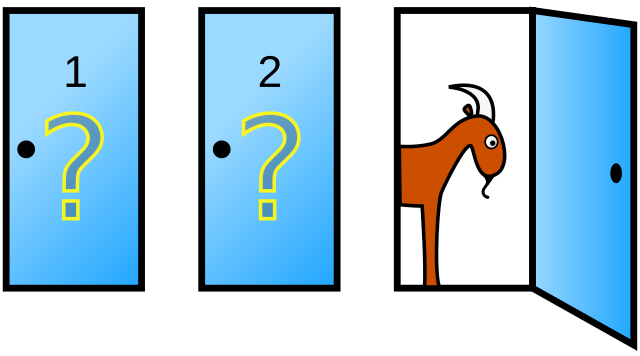

In [37]:
import PIL
montey_hall_image = PIL.Image.open("montey_hall.png")
montey_hall_image

In [38]:
prompt="""
    Run a simulation of the Monty Hall Problem with 1,000 trials.

    The answer has always been a little difficult for me to understand when people
    solve it with math - so run a simulation with Python to show me what the
    best strategy is.
"""
result = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        montey_hall_image
    ],
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

display_code_execution_result(result)

---

Monty Hall Simulation Results (with 1000 trials):
Switching doors win percentage: 65.50%
Staying with initial choice win percentage: 34.50%


---

The simulation results show that switching doors wins approximately 66% of the time, while staying with the initial choice wins approximately 34% of the time. This demonstrates that switching doors is the better strategy in the Monty Hall Problem.


---

In [39]:
result = client.models.generate_content_stream(
    model=MODEL_ID,
    contents=[
        prompt,
        montey_hall_image
    ],
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for chunk in result:
  display_code_execution_result(chunk)

---

Monty Hall Simulation Results (Trials: 1000):
  Switching Doors Win Percentage: 66.20%
  Staying with Original Choice Win Percentage: 33.80%


---

The

---

 simulation results clearly demonstrate the advantage of switching doors in the Monty Hall Problem. After

---

 running 1,000 trials, the switching strategy yielded a win percentage of

---

 approximately 66%, while staying with the original choice resulted in a win percentage of approximately 34%. This strongly suggests that switching doors is the better strategy to

---

 maximize your chances of winning.


---